In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/moviedata/sample_submission.csv
/kaggle/input/moviedata/movies.csv
/kaggle/input/moviedata/imdb_data.csv
/kaggle/input/moviedata/genome_tags.csv
/kaggle/input/moviedata/genome_scores.csv
/kaggle/input/moviedata/train.csv
/kaggle/input/moviedata/test.csv
/kaggle/input/moviedata/tags.csv
/kaggle/input/moviedata/links.csv


# CB2 Movie recommendation notebook

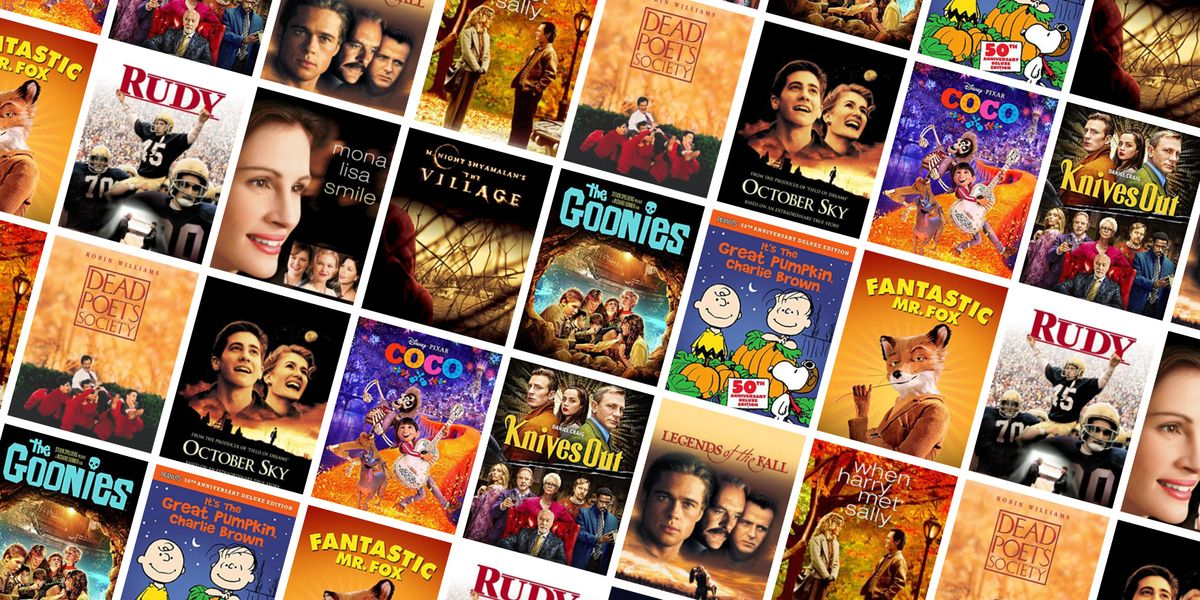

## Table of Contents

1. <a href ="#1.-Task-Description">Task Description</a>
2. <a href ="#2.-Evaluation">Evaluation</a>
3. <a href ="#3.-Comet-Experiment">Comet Experiment</a>
4. <a href ="#4.-Importing-Libraries">Importing Libraries</a>
5. <a href ="#5.-Importing-Data">Importing Data</a>
6. <a href ="#6.-Data-Overview">Data Overview</a>
7. <a href ="#7.-Exploratory-Data-Analysis"> Exploratory Data Analysis</a>
8. <a href ="#8.-Recommendation-System:-Content-Based-Filtering">Recommendation System: Content Based Filtering</a>
9. <a href ="#9.-Dimensionality-Reduction">Dimensionality Reduction</a>
10. <a href ="#10.-Collaborative-Filtering">Collaborative Filtering</a>
11. <a href ="#11.-Conclusion">Conclusion</a>
12. <a href ="#12.-Submission">Submission</a>

## 1. Task Description
In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, the client has tasked us to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

## 2. Evaluation


The evaluation metric for this competition is Root Mean Square Error. Root Mean Square Error (RMSE) is commonly used in regression analysis and forecasting, and measures the standard deviation of the residuals arising between predicted and actual observed values for a modelling process. For our task of generating user movie ratings via recommendation algorithms, the the formula is given by:
                                           

## 3. Comet

In [2]:
!pip install comet_ml
# point comet_ml SDK to www.comet.com installation
import os
os.environ["COMET_URL_OVERRIDE"] = "https://www.comet.com/clientlib/"

# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="h3bQ9KYqt3r8nf4Y9oerJWCNn",
    project_name="cb2-movie-classifier",
    workspace="vicariousvision",
)

# Run your code and go to /


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.2/361.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.3/554.3 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=371cf24065084cecd57493e3ae2f40af3053a59251cec20dcfc097d3274a07af
  Stored in directory: /root/.cache/pip/wheels/df/99/da/c34f202dc8fd1dffd35e0ecf1a7d7f8374ca05fbcbaf974b83
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=b3da59f8033aafcd147a89671ac106ef47bd7e773b5c743cc0e599aa8dada18b
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built nvidia-ml-py3 configobj


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.com/vicariousvision/cb2-movie-classifier/daec54cdc007434c9ba3f0e5167e2c9d



## 4. Importing Libraries

In [3]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from sklearn.neighbors import  NearestNeighbors
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Packages for Randomisation
import random


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


## 5. Importing Data

In [4]:
#Movies dataframe
df_movies = pd.read_csv('../input/moviedata/movies.csv')

#sample submission
df_sample = pd.read_csv('../input/moviedata/sample_submission.csv')

#Genome_scores dataframe
df_gesc = pd.read_csv('../input/moviedata/genome_scores.csv')

#links dataframe
df_links = pd.read_csv('../input/moviedata/links.csv')

#Genome_tags dataframe
df_getg = pd.read_csv('../input/moviedata/genome_tags.csv')

#imbd dataframe
df_imdb = pd.read_csv('../input/moviedata/imdb_data.csv')

#tags dataframe
df_tags = pd.read_csv('../input/moviedata/tags.csv')

#train dataframe
df_train = pd.read_csv('../input/moviedata/train.csv')

#test dataframe 
df_test = pd.read_csv('../input/moviedata/test.csv')

## 6. Data Overview

We have been given 8 data files to work with an one sample file of what we should output. In these files are records of movie names, name of directors, cast, budget etc. 

In the data there are two rating sources that have been used, one from imDB and The Movie Database. We will try to use these rating scores in our model building.


In [5]:
df_movies.head(2) #contains movieId, title and genre

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [6]:
df_links.head(2) #links a movie with its rating from imDB and its rating from The Movie Database

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


In [7]:
df_tags.head(2) #User assigned for the movies within the dataset. Can be used to group simmilar users or movies

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256


In [8]:
df_imdb.head(2) #data from the imDB. Contains movieID, cast, director, runtime, budget and key words that are associated with its plot

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game


In [9]:
df_train.head(2) #the data we will be training the model on. Time stamp could be dropped from this data.

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739


In [10]:
df_train.info() #we're working with int data types which works for the models we are using

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


## 7. EDA